# Sentimental Analysis Of User Reviews For Game of Thrones!!

## Introduction

&nbsp;&nbsp;This project focuses on answering the two questions which are, What is the growth rate of rating of Game of thrones series and What is the sentimental Analysis of season 8 of User Reviews which is the goal.
Game of Thrones is an American fantasy drama television series created by David Benioff and D. B. Weiss for HBO. It is an adaptation of A Song of Ice and Fire, George R. R. Martin's series of fantasy novels, the first of which is A Game of Thrones.
The basic plot of this series inlvoves Nine noble families fight for control over the mythical lands of Westeros, while an ancient enemy returns after being dormant for thousands of years. and enterprise networking. Dan is from and lives in the United States.


## Materials/Methods

The python library IMDb() was used to retrieve the Movie/Series data from the IMDB and matplotlib was used to plot the bar graph.

## Resources Used

* IMDB for Movie/Series Database source to collect the data.
* Sentimental Analyzer and Matplotlib for generating results.

## Analysis of Steps

* Used IMDb package functions to retrieve information about Movie/Series, ratings, user reviews.
* Stored the data in a pickle file 
* Used Sentiment Analyzer to analyze the data.
* Plotted the Historgam for ratings season wise and graph for Positive vs Negative Sentiments to visualize the results.

## Python and IMDb package Imports Setup:

&nbsp;&nbsp;The code here will set up the python and the IMDb package imports.

In [10]:
#  Imported the pickle, nltk helpers, imdb helpers
#  Getting IMDB ratings, user reviews and pickling them.


import pickle

from nltk_helpers import get_sentiments

from imdb import IMDb
from imdb.helpers import sortedSeasons

#  creaeted an instance of IMDb 

ia=IMDb()


#tt  whole series Movie ID  0944947
#tt  Season 8 episodes ID 5924366, 6027908, 6027908, 6027912, 6027914, 6027916, 6027920

# loaded the title into series variable to get each episode rating 
# To average the rating each season wise using the below variables.

series = ia.get_movie('0944947')


ia.update(series, 'episodes')
sumofRating=0
no_of_epsdes=0
rating_avg=[]

for season_nr in sorted(series['episodes']):
    for episode_nr in sorted(series['episodes'][season_nr]):
       episode = series['episodes'][season_nr][episode_nr]
       sumofRating=sumofRating+episode.get('rating')
      
       no_of_epsdes=no_of_epsdes+1
    rating_avg.append(sumofRating/no_of_epsdes)
    sumofRating=0  
    no_of_epsdes=0
        


# For the sentimental analysis of season 8 each episode id is stored in the list.

Season8=['5924366','6027908','6027912','6027914','6027916','6027920']

# created the RawReview List to store the user review in the list format

RawReview=[]


for season in Season8:
    movie=ia.get_episode(season)
    reviews=ia.get_movie_reviews(season)
    for review in reviews['data']['reviews']:
        RawReview.append(review['content'])
         
         
          
        
         
# created a pickle file to dump the raw review of users
         
with open('season8.pkl', 'wb') as f:
    pickle.dump(RawReview,f)


# Reading the pickle file in to the sentis varible to access them for sentimental analysis

with open('season8.pkl','rb') as f:
    sentis =pickle.load(f)



## Matplplotlib style and pyplot package Imports Setup:

&nbsp;&nbsp;This code will take rating_avg passed and will generate the histogram plot for ratings of each season. 

[9.341234567890998, 9.158377425033859, 9.121234567891, 9.121234567890998, 9.111234567891, 9.041234567891001, 8.901234567890999, 6.501234567890999]


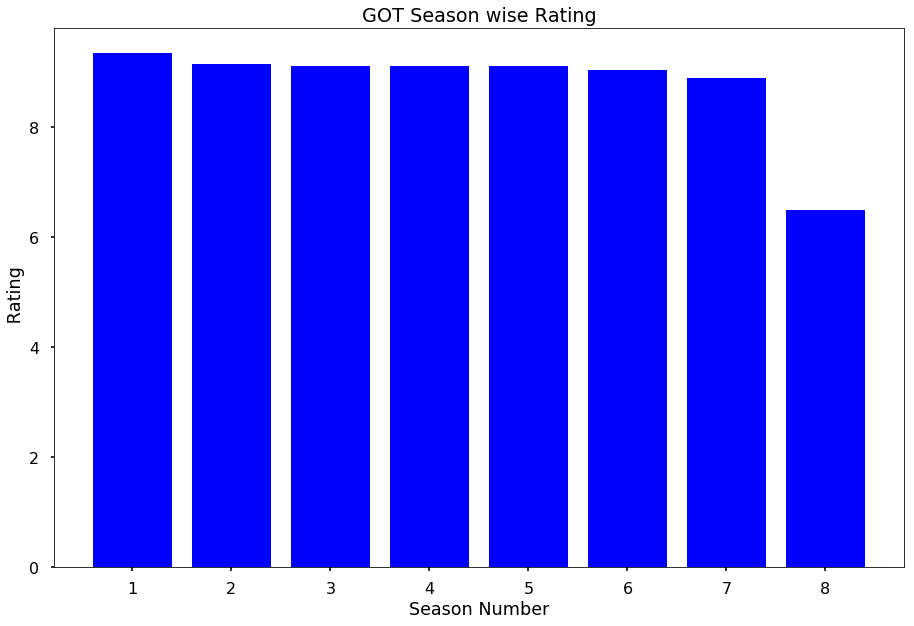

In [11]:
#  Plotting the bargraph using Matplotlib

import matplotlib.style as style

import matplotlib.pyplot as plt

NUM_VALUES = 8

heights=list(rating_avg)
heights.sort(reverse=True)
print(heights)
style.use('seaborn-poster')
plt.bar(range(1,9), heights[:NUM_VALUES],color='b')
plt.title('GOT Season wise Rating')
plt.ylabel(' Rating')
plt.xlabel('Season Number')


plt.tight_layout()

plt.savefig('Histogram_Plot.png',transparent=True)


plt.show()

## Matplplotlib style and pyplot package Imports Setup:

&nbsp;&nbsp;This code will return sentimental the sentimental analysis of each user review and splits it in three separate     &nbsp;&nbsp; variables. It scatters in the form of 2D plot for Positive vs Negative sentiments values in the tuple.

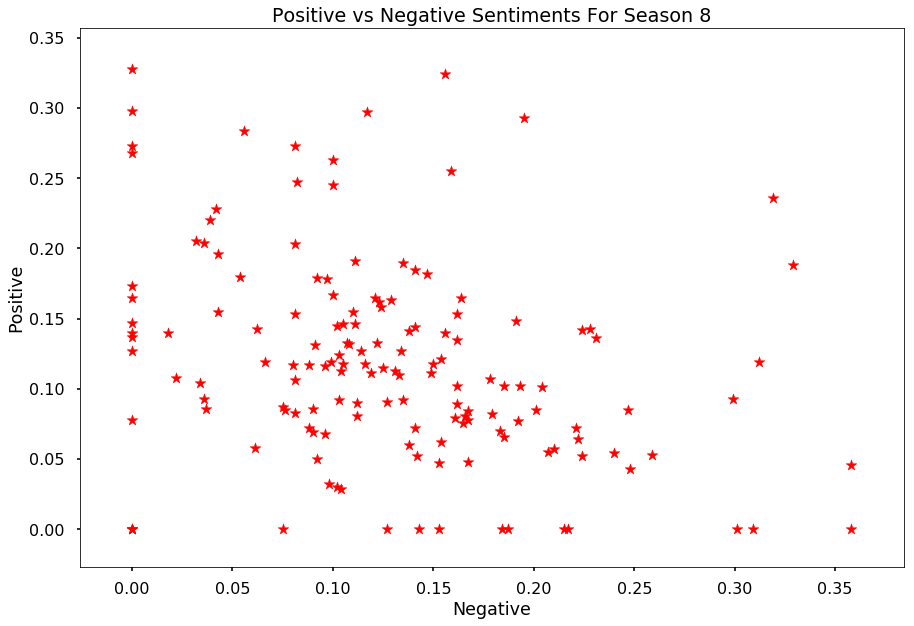

In [12]:
# Plotting scatter plot graph of Sentimental Analysis for Season 8 - GOT

import matplotlib.pyplot as plt
import matplotlib.style as style

#build our figure

style.use('seaborn-poster')
#fig = plt.figure()

from nltk_helpers import split_sentiments

dataX, dataY, dataZ = split_sentiments([get_sentiments(tweet) for tweet in sentis])


plt.scatter(dataX,dataZ,color='r',marker='*')

plt.xlabel('Negative')
plt.ylabel('Positive')

plt.title('Positive vs Negative Sentiments For Season 8')

#plt.legend(loc='upper right', shadow=True)

plt.tight_layout()

plt.savefig('Sentimental_2D_Plot.png', transparent=True)
plt.show()


# Conclusions:
&nbsp;&nbsp;&nbsp;&nbsp; From the histogram, we can clearly see that season 1-7 ratings were steady and rapid decrease of season 8 rating can be observed from bar graph. The user reviews found to be  polarized that is they have mutually exclusive opinions. Users epxressed individual strong opinions for the season 8. From this we can conclude that most of users were not satisfied with season 8 as compared to rest of the seasons and found the answer for the question, why there is a rapid decrease in rating of season 8.
